In [65]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [66]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv    

--2023-09-20 10:20:15--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.5’

housing.csv.5       100%[===================>]   1.36M  6.13MB/s    in 0.2s    

2023-09-20 10:20:16 (6.13 MB/s) - ‘housing.csv.5’ saved [1423529/1423529]



In [67]:
import pandas as pd

df = pd.read_csv('housing.csv')
len(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [68]:
df["median_house_value"]

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

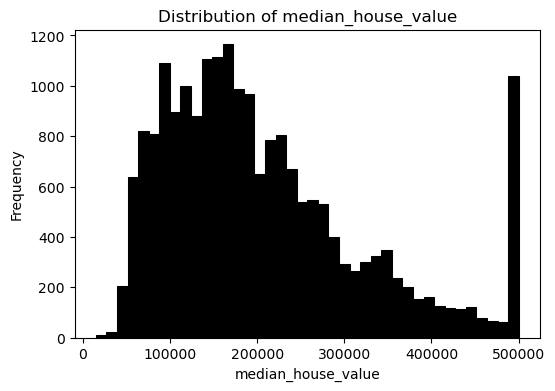

In [69]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('median_house_value')
plt.title('Distribution of median_house_value')

plt.show()

In [70]:
only_fields = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]
df_new = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])].filter(only_fields)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [71]:
# Question 1
# There's one feature with missing values. What is it?

In [72]:
df_new.columns[df_new.isnull().any()].tolist()

['total_bedrooms']

In [73]:
# Question 2
# What's the median (50% percentile) for variable 'population'?

In [74]:
df_new['population'].median()

1195.0

In [75]:
# Prepare and split the dataset
# Shuffle the initial dataset, use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [76]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [77]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [78]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [79]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [80]:
base = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [81]:
def prepare_X(df, set_mean=False):
    df_num = df[base]
    if not set_mean:
        df_num = df_num.fillna(0)
    else:
        df_num = df_num.fillna(df['total_bedrooms'].median())
    X = df_num.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    
    return round(np.sqrt(mse), 2)

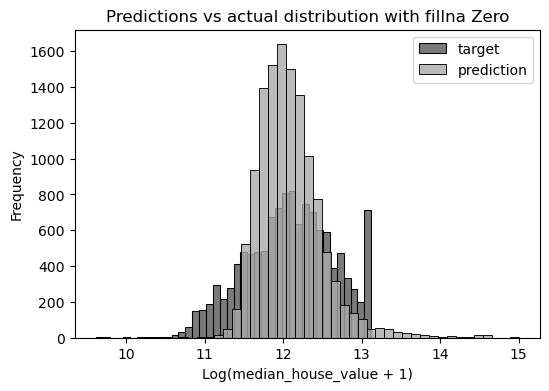

Zero 0.4


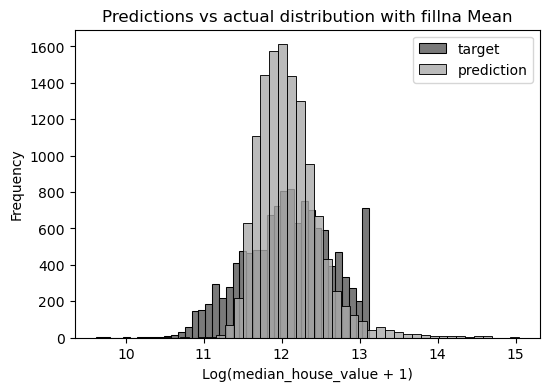

Mean 0.4


In [82]:
# Check regression with fill na and mean

set_means=[False, True]

for i in set_means:
    pr_fill_na = "Zero" if not i else "Mean"
    
    X_train = prepare_X(df_train, i)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    plt.figure(figsize=(6, 4))

    sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
    sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

    plt.legend()

    plt.ylabel('Frequency')
    plt.xlabel('Log(median_house_value + 1)')
    plt.title(f'Predictions vs actual distribution with fillna {pr_fill_na}')

    plt.show()
    
    print(pr_fill_na, rmse(y_train, y_pred))


In [83]:
# Question 4
# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?
# If there are multiple options, select the smallest r.

In [84]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [85]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.39
 1e-06 0.39
0.0001 0.39
 0.001 0.39
  0.01 0.39
   0.1 0.39
     1 0.39
     5 0.39
    10 0.39


In [86]:
# Question 5
# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))

In [89]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []
for seed in seeds:
    np.random.seed(seed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    
    rr = rmse(y_train, y_pred)
    print(seed, rr)
    rmse_list.append(rr)

std = round(np.std(rmse_list), 3)
    
print(f"Std is {std}")

0 0.4
1 0.4
2 0.4
3 0.4
4 0.4
5 0.4
6 0.39
7 0.4
8 0.39
9 0.39
Std is 0.005


In [90]:
# Question 6
# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?

In [94]:
seed = 9

np.random.seed(seed)

n = len(df)

n_test = int(0.2 * n)
n_train = n - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_test['median_house_value']

X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, 0.001)
y_pred = w_0 + X_train.dot(w)

rr = rmse(y_train, y_pred)
print(seed, rr)

9 0.39
